### Метод Ньютона

Задание

1. ответить на все вопросы в скрипте
2. изменить код метода Ньютона так, чтобы он смог разрешать все проблемные случаи, возникающие в скрипте, продемонстрировать это, объяснить почему модификация решает проблему. Проблемы - нулевая производная, кратные корни, биения. Для кратных корней надо так модифицировать метод, чтобы порядок оставался вторым и продемонстрировать это.

ВАЖНО! Модифицированный метод Ньютона должен получаться путем добавления новых строчек в simple_newton, а не переписыванием его с нуля. Новые строчки надо прокомментировать, зачем они были добавлены.

In [192]:
# простая реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import random

def simple_newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    for i in range(30):
        iteration += 1
        dx = -func(x)/dfunc(x)
        dxs.append(dx)
        x = x + dx+ np.random.normal()*tol
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

In [224]:
# модифицированная реализация Метода Ньютона
def simple_newton_1(func, dfunc, x, m = 1, tol = 1e-12):#m-кратность
    sol = 0
    bien = 0
    iteration = 0
    dxs = []
    for i in range(30):
        iteration += 1
        if dfunc(x) == 0:
            dx = -func(x)/0.005  #борьба с нулём, т.к.производная стремиться к нулю, это dx будет нижней оценкой
        else:
            dx = -func(x)/dfunc(x)
        dx = m*dx #m кратность корня
        dxs.append(dx)
        x = x + dx
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 70 iterations!')
    return [sol, iteration]

#### Нелинейное уравнение 1

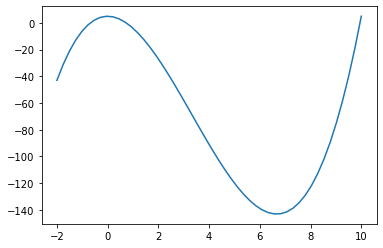

In [5]:
x = np.linspace(-2,10)
func0 = lambda x: x**3 - 10*x**2 + 5
dfunc0 = lambda x: 3*x**2 - 20*x
y = func0(x)
plt.plot(x, y)

In [6]:
ddfunc0 = lambda x: 6*x - 20
print(func0(0.0), ddfunc0(0.0))

5.0 -20.0


Text(0.5, 1.0, 'График f(x), красные точки соответсвуют значениям x в которых f(x)*d(d(f(x))) > 0(выполнено достаточное условие), синие, соответсвенно, в которых не выполнено')

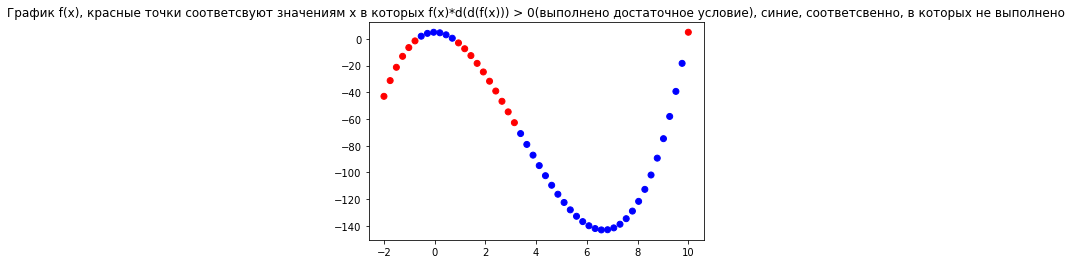

In [7]:
kcolors = ['red' if ddfunc0(value)*func0(value) > 0 else 'blue' for value in x]
plt.scatter(x, y, c = kcolors)
plt.title("График f(x), красные точки соответсвуют значениям x в которых f(x)*d(d(f(x))) > 0(выполнено достаточное условие), синие, соответсвенно, в которых не выполнено")

Text(0.5, 1.0, 'График f(x), красные точки соответсвуют значениям x в которых шаг алгаритма  dx> 0, синие, соответсвенно, в которых dx меньше или равно нулю')

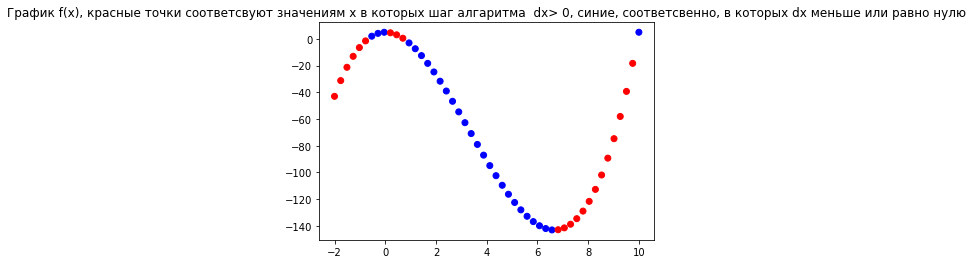

In [9]:
kcolors2 = ['red' if -func0(value)/dfunc0(value) > 0 else 'blue' for value in x]
plt.scatter(x, y, c = kcolors2)
plt.title("График f(x), красные точки соответсвуют значениям x в которых шаг алгаритма  dx> 0, синие, соответсвенно, в которых dx меньше или равно нулю")

1. Объяснить, почему различаются результаты в случае 1 и 2

Как видно из построеных графиков в первом случае у нас из-за знака dx, ноль будет искаться на отрезке x от 0.7 до 6

А во втором случае мы ищем ноль на отрезке от 8 до 10


2. Объяснить, что происходит в случае 3

 Производная общается в нуль, поэтому dx не определён.
 
 
3. Построить график порядка сходимости от номера итерации. Объяснить результат

Случай 1: Сначало идёт стабилизация, после чего порядок сходимости стремиться к двум

Cлучай 2: Порядок сходимости изначально сходиться к двум, как и ожидалось в теории

Случай 3: Начальные скачки связаны с нулевой производной и её последсвиями, а далее почти всё время порядок сходимости равен двум, после опять происходит скачок, наверно производная оопять обращается в ноль и далее порядок стремиться к двум.

In [194]:
data = simple_newton(func0, dfunc0, 8) # случай 1
#data = simple_newton(func0, dfunc0, 0.7) # случай 2
#data = simple_newton(func0, dfunc0, 0.0) # случай 3
print('sol = ', data[0])
print('iter = ', data[1])
print('dxs = ', data[2])

sol =  9.949491057916127
iter =  7
dxs =  [3.84375, -1.43318004995633, -0.42331473560008337, -0.03747855950674517, -0.00028558050149066005, -1.6519987486711144e-08, -5.870714099353364e-13]


sol =  9.949491057914388
iter =  7
dxs =  [3.84375, -1.4331800499567324, -0.42331473559945476, -0.03747855950706142, -0.00028558050172265036, -1.6520643011102794e-08, 1.1602201777380943e-15]


<ipython-input-195-1e35138701bf>:8: RuntimeWarning: divide by zero encountered in log
  Y.append((np.log(abs(temp+i - data[0])))/(np.log(abs(temp- data[0]))))


Text(0, 0.5, 'p - порядок сходимости')

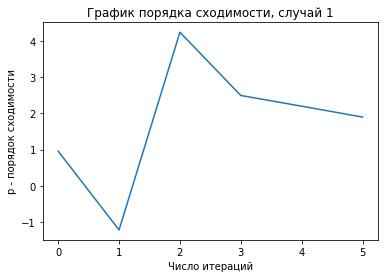

In [195]:
data = simple_newton_1(func0, dfunc0, 8) # случай 1
print('sol = ', data[0])
print('iter = ', data[1])
print('dxs = ', data[2])
temp = 8
Y = list()
for i in (data[2]):
    Y.append((np.log(abs(temp+i - data[0])))/(np.log(abs(temp- data[0]))))
    temp +=i
plt.plot(range(len(Y)), Y) 
plt.title("График порядка сходимости, случай 1")
plt.xlabel("Число итераций")
plt.ylabel("p - порядок сходимости")

sol =  0.7346035077893033
iter =  4
dxs =  [0.035355147645650474, -0.0007513033067216773, -3.365495579308525e-07, -6.759946809118796e-14]


<ipython-input-198-898b9917341f>:8: RuntimeWarning: divide by zero encountered in log
  Y.append((np.log(abs(temp+i - data[0])))/(np.log(abs(temp- data[0]))))


Text(0, 0.5, 'p - порядок сходимости')

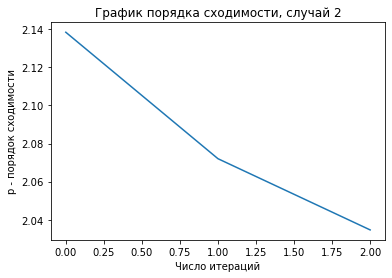

In [198]:
data = simple_newton_1(func0, dfunc0, 0.7) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])
print('dxs = ', data[2])
temp = 0.7
Y = list()
for i in (data[2]):
    Y.append((np.log(abs(temp+i - data[0])))/(np.log(abs(temp- data[0]))))
    temp +=i
plt.plot(range(len(Y)), Y)  
plt.title("График порядка сходимости, случай 2")
plt.xlabel("Число итераций")
plt.ylabel("p - порядок сходимости")

sol =  -0.6840945657036895
iter =  22
dxs =  [-1000.0, 334.43708443708607, 222.95439341051386, 148.63078931894745, 99.07903143018088, 66.04055308169397, 44.009074577413735, 29.3129797067105, 19.503575128467673, 12.947388590776264, 8.55475447686709, 5.599703726711923, 3.6011219531765715, 2.2440808412738344, 1.3246436528692942, 0.7067814890065381, 0.298237509621504, 0.06798551558282354, 0.0037155514079366004, 1.103589117120609e-05, 9.730050005915947e-11, -5.887494377216829e-17]


<ipython-input-225-2b72406a8695>:8: RuntimeWarning: divide by zero encountered in log
  Y.append((np.log(abs(temp+i - data[0])))/(np.log(abs(temp- data[0]))))


Text(0, 0.5, 'p - порядок сходимости')

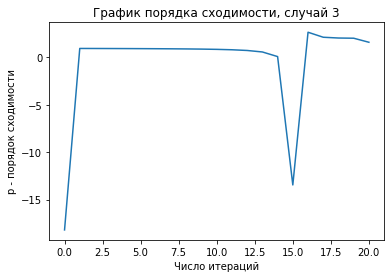

In [225]:
data = simple_newton_1(func0, dfunc0, 0.0) # случай 3
print('sol = ', data[0])
print('iter = ', data[1])
print('dxs = ', data[2])
temp = 0.0
Y = list()
for i in (data[2]):
    Y.append((np.log(abs(temp+i - data[0])))/(np.log(abs(temp- data[0]))))
    temp +=i
plt.plot(range(len(Y)), Y) 
plt.title("График порядка сходимости, случай 3")
plt.xlabel("Число итераций")
plt.ylabel("p - порядок сходимости")

#### Нелинейное уравнение 2

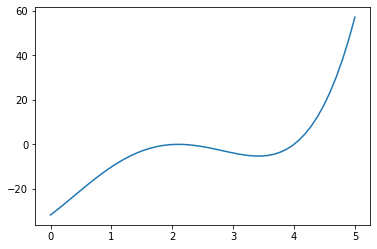

In [199]:
x = np.linspace(0,5)
func1 = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752 #double root
dfunc1 = lambda x: 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538
y = func1(x)
plt.plot(x, y)


1. Построить график порядка сходимости от номера итерации. Объяснить результат

График движется от тройки к единице  и стремиться к единице, как росток стремиться к солнцу
как всё живое стремиться уснуть ночью, чтобы проснуться полным сил утром
чтобы свершить что-то новое, понять жизнь и сойтись в единое целове с бесконечно вечным, как сходиться x к нулю функции в Методе-Ньютона

sol =  2.0999999838616983
iter =  23


Text(0, 0.5, 'p - порядок сходимости')

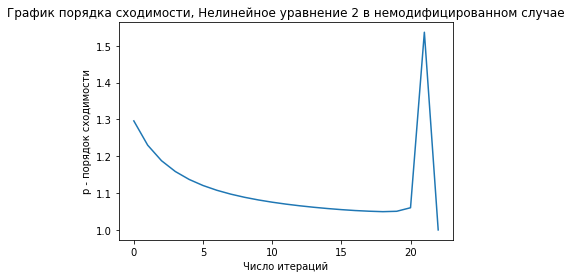

In [200]:
data = simple_newton(func1, dfunc1, 2.0)
print('sol = ', data[0])
print('iter = ', data[1])
temp = 2.0
Y = list()
for i in (data[2]):
    Y.append((np.log(abs(temp+i - data[0])))/(np.log(abs(temp- data[0]))))
    temp +=i
plt.plot(range(len(Y)), Y)   
plt.title("График порядка сходимости, Нелинейное уравнение 2 в немодифицированном случае")  
plt.xlabel("Число итераций")
plt.ylabel("p - порядок сходимости")

In [226]:
data = simple_newton_1(func1, dfunc1, 2.0, m =2)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  2.100000000014807
iter =  6


<ipython-input-227-74421d839944>:4: RuntimeWarning: divide by zero encountered in log
  Y.append((np.log(abs(temp+i - data[0])))/(np.log(abs(temp- data[0]))))
<ipython-input-227-74421d839944>:4: RuntimeWarning: invalid value encountered in double_scalars
  Y.append((np.log(abs(temp+i - data[0])))/(np.log(abs(temp- data[0]))))


Text(0, 0.5, 'p - порядок сходимости')

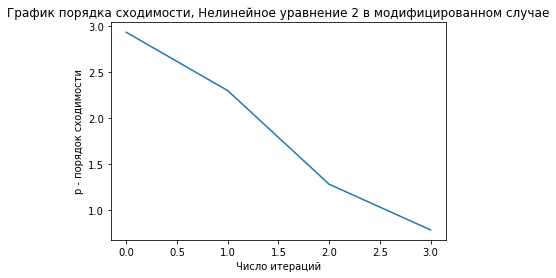

In [227]:
temp = 2.0
Y = list()
for i in (data[2]):
    Y.append((np.log(abs(temp+i - data[0])))/(np.log(abs(temp- data[0]))))
    temp +=i
plt.plot(range(len(Y)), Y)   
plt.title("График порядка сходимости, Нелинейное уравнение 2 в модифицированном случае") 
plt.xlabel("Число итераций")
plt.ylabel("p - порядок сходимости")

#### Нелинейное уравнение 3

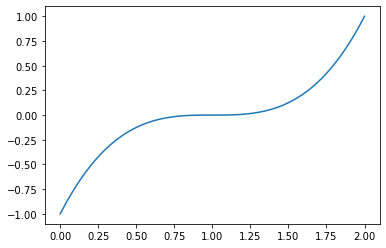

In [215]:
x = np.linspace(0,2)
func2 = lambda x: (x-1)**3
dfunc2 = lambda x: 3*(x-1)**2
y = func2(x)
plt.plot(x, y)

1. Подобрать начальное приближение и решить задачу

Ноль лежит на отрезке от a = 0,75 до  b = 1,25 т.к.

$$ f(a)*f(b) < 0$$ 

Достаточное условие практически выполняется при $$x_0 = b$$, за исключением знакопостоянства второй производной

Но т.к. условие достаточное, то можем запустить наш алгоритм из точки $$x_0 = b $$, кроме того наш алгоритм требует указать кратность, в данном случае она равна трём.

In [221]:
data = simple_newton_1(func2, dfunc2, 1.25, m = 3)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  1.0
iter =  2


#### Нелинейное уравнение 4

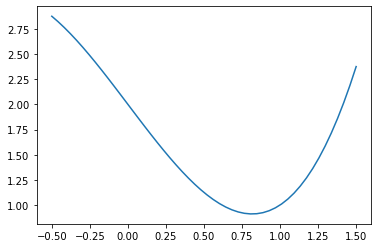

In [168]:
x = np.linspace(-0.5,1.5)
#x = np.linspace(-5,5)
func3 = lambda x: x**3 - 2*x + 2
dfunc3 = lambda x: 3*x**2 - 2
y = func3(x)
plt.plot(x, y)

1. Почему не находится решение во втором случае?

Во втором случае происходят биения

In [169]:
data = simple_newton(func3, dfunc3, 0.5) # случай 1
data = simple_newton(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])

More then 30 iterations!
sol =  nan
iter =  30


In [170]:
data = simple_newton_1(func3, dfunc3, 0.5) # случай 1
print('sol = ', data[0])
print('iter = ', data[1])

sol =  -1.7692923542386314
iter =  10


In [173]:
data = simple_newton_1(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])

More then 30 iterations!
sol =  nan
iter =  300
